# Финальный проект по курсу "Основы программирования в Python", 2021. Лика Капустина и Кирилл Крипайтис. 

## Сбор данных. Лика Капустина

### Списки:

* `titles` содержит названия материалов
* `dates` содержит даты выпуска материалов
* `categories` содержит категории материалов
* `descriptions` содержит описания материалов
* `authors` содержит автора материала
* `common_words` содержит 5 самых упоминаемых слов в материале
* `materials_length` содержит длину материала в словах
* `links_to_materials` содержит ссылки на материалы

In [ ]:
titles = []
dates = []
categories = []
descriptions = []
authors = []
common_words = []
materials_length = []
longests_words = []
podcasts_names_and_links = []
links_to_materials = []

### Использованные модули:

* `time`
* `pandas`
* `requests`
* `bs4`

In [ ]:
from time import sleep
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Универсальные списки для работы

* `list_of_pages` - список всех 16 страниц с материалами
* `stopwords` - список со словами, которые не учитываются при подсчете самых часто встречаемых слов
* `standard_links` - список со страницами, которые могут присутствовать на каждой странице

In [ ]:
list_of_pages = ['https://podcasts.ru/lenta/page/'+str(i)+'/' for i in range(2, 17)]
list_of_pages.insert(0, 'https://podcasts.ru/lenta/')

In [ ]:
stopwords = ['я', 'мы', 'ты', 'их', 'кто', 'они', 'но', 'вот', 'еще', 'не', 'его', 'из'
            'не', 'что', 'это', 'ли',
            '20202021', 'podcastsru', 'ctrlenter',
            'как', 'если', 'или',
            'для', 'этого', 'этот', 'тот',
            'вас', 'нас', 'вы', 'было',
            'был', 'все', 'очень', 'уже', 'тут', 'там', 'так', 'таких', 'этих', 'тех',
            'чтобы']

In [ ]:
standard_links = ['https://podcasts.ru/subscribe/',
 'https://podcasts.ru/lenta/',
 'https://podcasts.ru/news/',
 'https://podcasts.ru/reviews/',
 'https://podcasts.ru/translations/',
 'https://podcasts.ru/interview/',
 'https://podcasts.ru/articles/',
 'https://podcasts.ru/user-posts/',
 'https://podcasts.ru/video/',
 'https://podcasts.ru/lenta/',
 'https://podcasts.ru/lenta/',
 'https://podcasts.ru/about/',
 'https://podcasts.ru/useragreement/',
 'https://podcasts.ru/category/obzor/',
 'https://podcasts.ru/category/news/',
 'https://podcasts.ru/category/videos/',
 'https://podcasts.ru/category/articles/', 
 'https://podcasts.ru/category/user-posts/']
standard_links.extend(list_of_pages)

### Справка
Проект осуществляется с помощью нескольких программ.
* `inner_podcasts(soup)` обращается к преобразованному с помощью BeautifulSoup тексту html (`soup`), и получает на выходе словарь с названиями и ссылками на все подкасты, упомянутые на странице.


* `cleaning(s)` обращается к получаемой строке текста статьи и возвращает её без лишних знаков. Это нужно чтобы в дальнейшем определить самые часто встречающиеся слова; при наличии елочки `"` или восклицательного знака в слове (например, когда слово заканчивает предложение) цикл не сможет корректно отобразить реальную частоту встречаемости слов, ведь для Python `подкаст!` и `подкаст` это не одно и то же.


* `take_info_from_page` получает на вход ссылку на материал на сайте podcasts.ru и добавляет к изначальным спискам `titles`, `dates`, `categories`, `descriptions`, `authors`, `common_words`, `materials_length` соответствующие элементы из статьи


* `take_info_from_lenta_page` получает на вход ссылку на одну из 16 страниц


* `main()` - основная программа. Использует все программы, упомянутые выше, и получает результаты.

`inner_podcasts(soup)`

In [ ]:
def inner_podcasts(soup): 
    inner_links = {}
    for i in soup.find_all('a'):
        if i.get('href') != None and 'podcast.ru/' in i.get('href') and i.get('href') != 'https://podcast.ru/' and i.get('href') != 'https://podcast.ru/1541595049':
            inner_links[i.text] = i.get('href')
    return inner_links

`cleaning(s)`

In [ ]:
def cleaning(s):
    new = str()
    for i in s:
        if i not in "!#$%&'()""*+,-./:;<=>?@[\]^_{|}~." and i != '«' and i != '»':
            new += i
    return new

`take_info_from_page`

In [ ]:
def take_info_from_page(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    
    links_to_materials.append(url)
    
    title = soup.find_all('title')[0].text.replace(' | Podcasts.ru', '')
    titles.append(title)
    
    date = soup.find_all('time')[0].text
    dates.append(date)
    
    category = soup.find_all('span')[0].text
    categories.append(category)
    
    description = soup.find_all('meta', {'name':'description'})[0].attrs['content']
    descriptions.append(description)
    
    author = soup.find_all('a', {'class':'post-author-name fn'})[0].text
    authors.append(author)
    
    words = []
    for i in range(len(soup.find_all('p'))):
        s = (soup.find_all('p')[i].text)
        s = cleaning(s).split()
        words.extend(s)
        
    length_of_text = len(words)
    materials_length.append(length_of_text)
    
    words_dict = {}
    for i in words:
        if i.lower() not in stopwords and len(i) > 2:
            words_dict[i.lower()] = words_dict.get(i.lower(), 0) + 1
    words_tuple_list = [(v, k) for k,v in words_dict.items()]
    five_most_common_words = [i[1] for i in sorted(words_tuple_list, reverse=True)[:5]]
    most_common_words = ', '.join(five_most_common_words)
    common_words.append(most_common_words)
    
    words_length = [len(i) for i in words_dict.keys()]
    maximum_length = max(words_length)
    
    longests_words_in_material = [k for k,v in words_dict.items() if len(k) == maximum_length]
    longests_words.append(longests_words_in_material)
    
    inner_links = inner_podcasts(soup)
    podcasts_names_and_links.append(inner_links)

`take_info_from_lenta_page`

Я обращаюсь тут к конкретной странице на сайте: например, странице 2, странице 3, странице 4 и так далее.  Мне нужно вытянуть с нее код через `BeautifulSoup`. Дальше – получить список всех ссылок через генератор списков. После каждую эту ссылку прогнать через `take_info_from_page`.

In [ ]:
def take_info_from_lenta_page(link):
    html = requests.get(link)
    soup = BeautifulSoup(html.text)
    
    all_links = [i.get('href') for i in soup.find_all('a') if i.get('href') != None]
    all_links = [i for i in all_links if len(i) >= 18]
    links_on_the_page = [i for i in all_links if 'podcasts.ru/' in i]
    links_on_the_page = [i for i in links_on_the_page if i not in standard_links]
    
    for i in links_on_the_page:
        take_info_from_page(i)
        sleep(1)

`main`

In [ ]:
def main():
    for i in list_of_pages:
        take_info_from_lenta_page(i)

## Получаем данные

In [ ]:
main()

## Итоговый датафрейм и таблица

In [ ]:
data = pd.DataFrame({'Название материала': titles,
              'Дата': dates,
              'Категория': categories,
              'Автор': authors,
              'Самые часто встречаемые слова': common_words,
              'Длина материала в словах': materials_length,
              'Самые длинные слова': longests_words,
              'Упомянутые подкасты': podcasts_names_and_links,
              'Ссылка на материал' : links_to_materials})
data

,Название материала,Дата,Категория,Автор,Самые часто встречаемые слова,Длина материала в словах,Самые длинные слова,Упомянутые подкасты,Ссылка на материал
0,Дайджест новостей: 10—17 декабря,17.12.21,Новости,Эдуард Царионов,"подкаст, подкастов, которые, студия, подборку",472,"[благотворительный, подкастплатформах]","{'Я с тобой': 'https://podcast.ru/1598587290',...",https://podcasts.ru/dajdzhest-novostej-10-17-d...
1,"35 инди-подкастов, которые вышли в 2021 году",15.12.21,Обзоры,Эдуард Царионов,"подкаст, про, которые, том, рассказывает",1208,[литературнотерапевтическое],{'Выход в город': 'https://podcast.ru/15470065...,https://podcasts.ru/35-indi-podkastov-kotorye-...
2,Подборка новогодних эпизодов,14.12.21,Обзоры,Маргарита Берденникова,"эпизода, описание, длительность, минут, хочется",410,[подкастэксперимент],{'«Запах мандаринов»': 'https://podcast.ru/159...,https://podcasts.ru/podborka-novogodnih-epizodov/
3,Дайджест новостей: 3—10 декабря,10.12.21,Новости,Эдуард Царионов,"подкастов, подкаст, подкаста, которые, года",680,[предпринимательством],{'Секс с Мари': 'https://podcast.ru/1547079187...,https://podcasts.ru/dajdzhest-novostej-3-10-de...
4,Кейс: как сделать художественный проект по Дос...,9 Дек в 11:52,Кейсы,Brainstorm.fm,"тимур, когда, нужно, режиссер, ната",2801,[литературоведческие],{'«Музы»': 'https://podcast.ru/1552608723?fbcl...,https://podcasts.ru/kejs-kak-sdelat-hudozhestv...
...,...,...,...,...,...,...,...,...,...
283,Борьба за интеллектуальную собственность: подк...,24 Июн 2020,Переводы,Эдуард Царионов,"spotify, права, the, прав, между",878,[продакшкомпаниями],{'The Nod': 'https://podcast.ru/1250583865'},https://podcasts.ru/podkasty-lejbly-i-spotify/
284,Переводы,30 Ноя в 14:41,Переводы,Вика Афонина,"музыки, точек, теории, создании, сентября",33,[композиторов],"{'': 'https://podcast.ru/1583580355', 'HansZim...",https://podcasts.ru/category/translations/
285,В лонг-лист премии «Просветитель.Digital» попа...,24.06.20,Новости,Эдуард Царионов,"просветительdigital, сентября, премии, подкаст...",133,[просветительdigital],{'«Закат империи»': 'https://podcast.ru/149209...,https://podcasts.ru/v-long-list-premii-prosvet...
286,Spotify будет делать подкасты про супергероев DC,21.06.20,Новости,Эдуард Царионов,"подкастов, spotify, эксклюзивных, шоу, сделку",134,[сверхестественное],{},https://podcasts.ru/spotify-budet-delat-podkas...


## Анализ данных. Кирилл Крипайтис

### Использованные модули:

* `NumPy`
* `Matplotlib`
* `Matplotlib.pyplot`
* `Collections`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter

Чистим датафрейм от пустых значений

In [ ]:
data = data.replace({'shape':None}, 'unknown')

Создаем функцию, которая возвращает данные по авторам, и смотрим на эту колонку. Всего материалов 288, и у каждого из них есть автор. Можем узнать, сколько материалов написал тот или иной автор. 

In [ ]:
def author_list():
    return data['Автор']

In [ ]:
author_list()

0             Эдуард Царионов
1             Эдуард Царионов
2      Маргарита Берденникова
3             Эдуард Царионов
4               Brainstorm.fm
                ...          
283           Эдуард Царионов
284              Вика Афонина
285           Эдуард Царионов
286           Эдуард Царионов
287           Эдуард Царионов
Name: Автор, Length: 288, dtype: object

Для того, чтобы узнать количество материалов, написанных автором, нужно сначала создать список с уникальными авторами. Сначала создаем функцию, которая возвращает уникальных авторов из колонки, а потом через цикл создаем список.

In [ ]:
def author_unique():
    return data['Автор'].unique()

author_unique = np.array(author_unique())

author_unique_list = []

for author_num in range(len(author_unique)):
  author_unique_list.append(author_unique[author_num])

In [ ]:
author_unique_list

['Эдуард Царионов',
 'Маргарита Берденникова',
 'Brainstorm.fm',
 'Вика Афонина',
 'Софья Девяткина',
 'Go Mobile',
 'Ира Волченко',
 'Радио Свобода',
 'Анна Лобанова',
 'Александр Архипов',
 'Александр Головин',
 'Irina Sergeeva',
 'Karina Milenina',
 'Никита Лакеев',
 'Ксения Лацвиева',
 'Амаль',
 'Vika Grem',
 'Anna Chekareva',
 'Александр Степакин',
 'Саша Начито',
 'Аня Цыплухина',
 'Анастасия Инки',
 'Юля Ткачук',
 'Подкаст-студия ТОЛК',
 'Виталий Сонько',
 '«Богема» студия подкастов',
 'Фёдор Тормосов',
 'Сева Бойко',
 'Студия подкастов "Послушайте!"',
 'Иван Макридин',
 'Андрей Аллахвердов',
 'Гоша Свиридов',
 'Александра Рудко',
 'Тельман']

Теперь создаём словарь, в котором ключом будет имя, ник автора или название студии-автора, а значением — количество вхождений в изначальный список *author_list()*.

In [ ]:
author_count = {}

for author in author_unique_list:
  author_count[author]=[np.sum(author_list() == author)]

In [ ]:
author_count

{'Anna Chekareva': [1],
 'Brainstorm.fm': [2],
 'Go Mobile': [3],
 'Irina Sergeeva': [1],
 'Karina Milenina': [1],
 'Vika Grem': [1],
 '«Богема» студия подкастов': [1],
 'Александр Архипов': [2],
 'Александр Головин': [2],
 'Александр Степакин': [1],
 'Александра Рудко': [1],
 'Амаль': [1],
 'Анастасия Инки': [1],
 'Андрей Аллахвердов': [1],
 'Анна Лобанова': [1],
 'Аня Цыплухина': [2],
 'Вика Афонина': [67],
 'Виталий Сонько': [1],
 'Гоша Свиридов': [1],
 'Иван Макридин': [2],
 'Ира Волченко': [10],
 'Ксения Лацвиева': [1],
 'Маргарита Берденникова': [5],
 'Никита Лакеев': [1],
 'Подкаст-студия ТОЛК': [2],
 'Радио Свобода': [10],
 'Саша Начито': [1],
 'Сева Бойко': [1],
 'Софья Девяткина': [1],
 'Студия подкастов "Послушайте!"': [1],
 'Тельман': [2],
 'Фёдор Тормосов': [2],
 'Эдуард Царионов': [157],
 'Юля Ткачук': [1]}

Визуализируем полученный словарь. Для этого подготовим данные, чтобы *matplotlib* мог легко ссылаться и получать либо label, либо координату. 

In [ ]:
author_plot = {"x":[], "label":[]}
for label, coord in author_count.items():
    author_plot["x"].append(coord[0])
    author_plot["label"].append(label)

Для визуализации воспользуемся *barh*, одной из функций *matplotlib*. *Barh* отличается от обычной функции *bar* тем, что располагает стобцы не вертикально, а горизонтально, то есть буквально *bar horizontal*. Функция *xlabel* позволяет создать подпись по координате x. С помощью *figsize* и *fontsize* мы настраиваем размеры фигур и подписей. 

<BarContainer object of 34 artists>

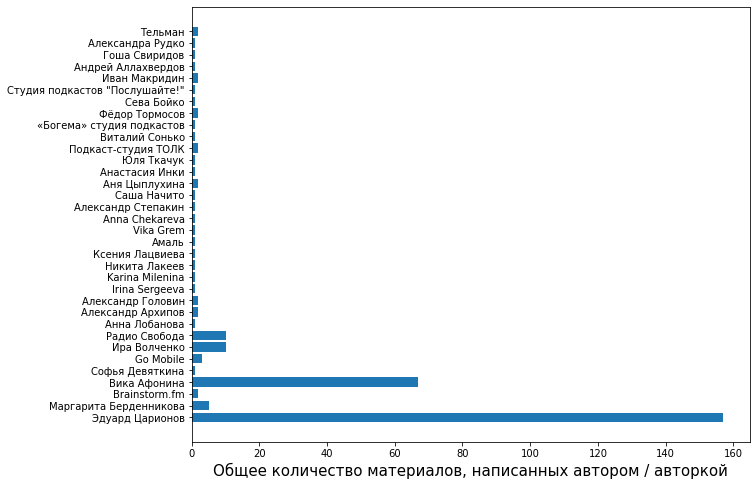

In [ ]:
plt.figure(figsize=(10,8))
plt.title('', fontsize=20)
plt.xlabel('Общее количество материалов, написанных автором / авторкой', fontsize=15)
plt.barh(author_plot["label"], author_plot["x"], align = 'center', data = author_plot)

Как мы видим, Эдуард Царионов (главный редактор) и Вика Афонина (редакторка сайта) написали гораздо больше материалов, чем остальные авторы. Посмотрим на гистограмму без них. Для это скопируем наши данные в новый словарь и удалим пары ключ-значение по ключам.

In [ ]:
author_count_new = author_count.copy()

In [ ]:
del author_count_new['Эдуард Царионов']
del author_count_new['Вика Афонина']

Снова подготовим данные для построения графика

In [ ]:
author_plot_new = {"x":[], "label":[]}
for label, coord in author_count_new.items():
    author_plot_new["x"].append(coord[0])
    author_plot_new["label"].append(label)

<BarContainer object of 32 artists>

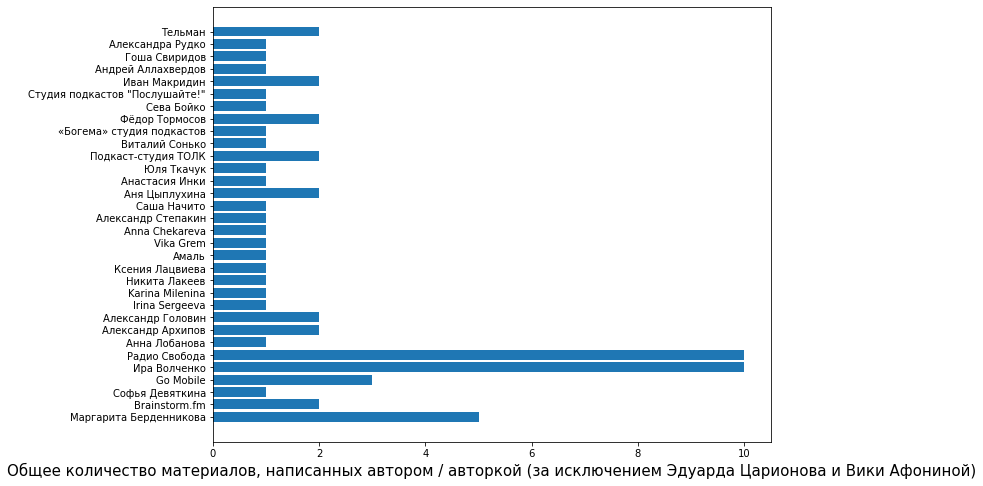

In [ ]:
plt.figure(figsize=(10,8))
plt.title('', fontsize=20)
plt.xlabel('Общее количество материалов, написанных автором / авторкой (за исключением Эдуарда Царионова и Вики Афониной)', fontsize=15)
plt.barh(author_plot_new["label"], author_plot_new["x"], align = 'center', data = author_plot_new)

Проделаем аналогичный процесс с категориями подкастов. Механизм практически полностью идентичен уже использованному механизму с авторами.

In [ ]:
def category_list():
    return data['Категория']

In [ ]:
def category_unique():
    return data['Категория'].unique()

category_unique = np.array(category_unique())

category_unique_list = []

for category_num in range(len(category_unique)):
  category_unique_list.append(category_unique[category_num])

In [ ]:
category_unique_list

['Новости', 'Обзоры', 'Кейсы', 'Статьи', 'Переводы', 'Видео', 'Интервью']

In [ ]:
category_count = {}

for category in category_unique_list:
  category_count[category]=[np.sum(category_list() == category)]

In [ ]:
category_count

{'Видео': [9],
 'Интервью': [48],
 'Кейсы': [14],
 'Новости': [94],
 'Обзоры': [38],
 'Переводы': [30],
 'Статьи': [55]}

In [ ]:
category_plot = {"x":[], "label":[]}
for label, coord in category_count.items():
    category_plot["x"].append(coord[0])
    category_plot["label"].append(label)

<BarContainer object of 7 artists>

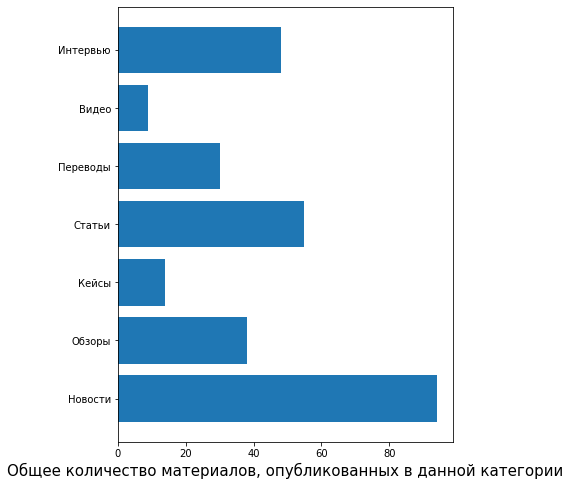

In [ ]:
plt.figure(figsize=(6,8))
plt.title('', fontsize=20)
plt.xlabel('Общее количество материалов, опубликованных в данной категории', fontsize=15)
plt.barh(category_plot["label"], category_plot["x"], align = 'center', data = category_plot)

После реализации механизма по отношению к категориям обратимся к упомянутым в материалах подкастам. Работа с ними имеет нюансы, потому что это не список, как раньше, а список словарей.

In [ ]:
def podcast_list():
    return data['Упомянутые подкасты']

In [ ]:
podcast_list()

0      {'Я с тобой': 'https://podcast.ru/1598587290',...
1      {'Выход в город': 'https://podcast.ru/15470065...
2      {'«Запах мандаринов»': 'https://podcast.ru/159...
3      {'Секс с Мари': 'https://podcast.ru/1547079187...
4      {'«Музы»': 'https://podcast.ru/1552608723?fbcl...
                             ...                        
283         {'The Nod': 'https://podcast.ru/1250583865'}
284    {'': 'https://podcast.ru/1583580355', 'HansZim...
285    {'«Закат империи»': 'https://podcast.ru/149209...
286                                                   {}
287    {'«Ни за что»': 'https://podcast.ru/1504238503...
Name: Упомянутые подкасты, Length: 288, dtype: object

Преобразуем список словарей, получив список ключей словаря для дальнейшего анализа.

In [ ]:
podcast_list_new=[]

In [ ]:
for label in data['Упомянутые подкасты']:
  podcast_list_new.extend(label)

Очистим данные от мусорных наблюдений, которые содержат "платформ", "на всех", "доступ".

Посмотрим на полученный список ключей. Подкастов довольно много, что оправдано спецификой сайта.

In [ ]:
def podcast_list_func():
  return podcast_list_new

podcast_list_func()

['Я с тобой',
 'Министерство собачьих дел',
 'на всех подкаст-платформах',
 'доступно',
 'Выход в город',
 'Без понятия',
 'True Detective Podcast',
 'Секс с Мари',
 'Покалигарим',
 'Девочки говорят',
 'Ежу не понятно',
 'Жертва научпопа',
 'Слово коже',
 'Базаров порезал палец',
 'Акулы фантазирования',
 'Об истории и искусстве. Проект YaAndArt',
 'Ты — это важно',
 'Технический перерыв',
 'Подстрочник',
 'The House of the Dev',
 'Эксперты в области ничего',
 'Бака!',
 'Слова',
 'Он первый начал',
 'Вышка 5G',
 'Привет, ты иноагент',
 'Код человека',
 'Раз в месяц это мало',
 'Сколько денег на карточке?',
 'Предоставленные неудобства',
 'ROMA. Падение Республики',
 'Дизайн Замес',
 'Парк культуры',
 'Химера интерьера',
 'Трип по девяностым',
 'Слушай Сереж',
 'Усы, лапы и хвост',
 '«Запах мандаринов»',
 '«Как жить»',
 '«Куда бежишь?»',
 '«Метод омлета»',
 '«Зеленый подкаст»',
 '«Осторожно: утро!»',
 'Секс с Мари',
 'Почему мы ещё живы',
 'Неприниматели',
 'на всех подкаст-платформах',

Получаем уникальные наименования с помощью функции set.

In [ ]:
podcast_unique_list = []

def podcast_unique_create():
  unique_podcast = set(podcast_list_new)
  for podcast in unique_podcast:
    podcast_unique_list.append(podcast)

podcast_unique_create()

In [ ]:
def podcast_unique():
  return podcast_unique_list

podcast_unique()

['',
 'Мой новый мир',
 '«Живи там хорошо»',
 'Суть еды',
 'Ozzy Morrison',
 'Питч Дичь',
 'Мой дом — моя прелесть',
 'Летчицы',
 'Химера интерьера',
 'RISK',
 'Отвечают сирийские мистики',
 'Розенталь и Гильденстерн',
 '«У Холмов Есть Подкаст»',
 '«Поинткастом»',
 'Сценарная мастерская',
 'Город, в котором',
 'Одного расстройства',
 '«Брендятина»',
 'Подкастерская',
 'У Холмов Есть Подкаст',
 'В предыдущих сериях',
 '1 Thema, 2 Farben',
 'Музыка на Свободе',
 '«Как жить»',
 'Что это было?',
 'Книгометр',
 'Moth',
 'Одни плюсы',
 'Радио Нигдегород. Подкаст из города, которого нет',
 'Осторожно: утро!',
 '«КритМышь»',
 'ROMA. Падение Республики',
 'Против театра',
 '«Закат империи»',
 'Record Megamix',
 'Кунжут и пряник',
 'Подросток Z',
 '«Это про нас»',
 'Кулзвук',
 'Превосходная степень',
 '«Норд-ост»',
 'Завтракаст',
 'Podcast.ru',
 '«Поэпизодный клан»',
 'Два по цене одного',
 '«Понаехали и остались»',
 'Pointcast',
 'Страдающее средневековье',
 ' Nice White Parents',
 '«Трасса 161

С помощью функции Counter получим словарь с количеством вхождений уникальных наименований в массив.

In [ ]:
podcast_count=Counter(podcast_list_new)

In [ ]:
podcast_count

Counter({'': 36,
         ' Nice White Parents': 1,
         ' «COVID-19: What You Need to Know»': 1,
         ' «Coronavirus: Fact vs. Fiction»': 1,
         ' «Соседний столик»': 1,
         '#спасибомненестрашно': 1,
         '1 Thema, 2 Farben': 1,
         '12 или 19?': 1,
         '13 Minutes to the Moon': 1,
         '180 градусов': 2,
         '6 Minute English': 1,
         '6 Minute Vocabulary': 1,
         '8 историй из 90-х': 2,
         'A Slight Change of Plans': 1,
         'AI Journey': 1,
         'Alles Gesagt': 1,
         'Answer Me This!': 1,
         'Anything for Selena': 1,
         'Appearances': 1,
         'Artcoin': 2,
         'BBC Short Cuts': 1,
         'Babylon Berlin': 1,
         'Backlisted': 1,
         'Bang Bang Education\xa0': 1,
         'BeardyCast': 5,
         'Beardycast': 1,
         'Beats and Chords': 1,
         'Bellit': 1,
         'Beware of the Leopard': 1,
         'Beyond the Screenplay': 1,
         'Blitz and Chips': 6,
         

Так как значений много, уберем из данных подкасты, которые упоминаются на сайте 1 или 2 раза (из-за подборок многие подкасты упоминались 1 или 2 раза, и это не является показательным), а также больше 29 раз (мусорные значения). 

In [ ]:
podcast_count = {k: v for k, v in podcast_count.items() if v > 2}
podcast_count = {k: v for k, v in podcast_count.items() if v < 30}

In [ ]:
podcast_count

{'BeardyCast': 5,
 'Blitz and Chips': 6,
 'Gurov Digital': 3,
 'Pointcast': 4,
 'Serial': 3,
 'The Big Beard Theory': 4,
 'Wind of Change': 3,
 'Zavtracast': 3,
 '«Богема и маркетинг»': 3,
 '«Истории русского секса»': 3,
 '«Одно расстройство»': 3,
 '«Тоже Россия»': 3,
 '«Это разве секс?»': 4,
 'Бака!': 3,
 'Бежать': 4,
 'Без понятия': 4,
 'Би-би-си.doc': 4,
 'Будни Сурка': 3,
 'В своем репертуаре': 3,
 'Взаперти': 4,
 'Взяла и сделала': 3,
 'Вы находитесь здесь': 4,
 'Голос зоны': 3,
 'Голый землекоп': 3,
 'Город, в котором': 4,
 'Девочки говорят': 3,
 'Деньги пришли': 6,
 'Дневники Лоры Палны': 8,
 'Живи там хорошо': 3,
 'Жуть': 5,
 'Заварили бизнес': 7,
 'Закат Империи': 5,
 'Закат империи': 3,
 'Извини, что голосовым': 3,
 'Искусство для пацанчиков': 4,
 'Искусство ошибаться': 5,
 'К тебе или ко мне?': 4,
 'Как посмотреть': 3,
 'Короче, история': 3,
 'Либо выйдет, либо нет': 3,
 'Мама, я в стартапе': 3,
 'Музы': 3,
 'НОРМ': 5,
 'Нараспашку': 3,
 'Научи меня плохому': 3,
 'Не занесли

In [ ]:
podcast_plot = {"x":[], "label":[]}
for label, coord in podcast_count.items():
    podcast_plot["x"].append(coord)
    podcast_plot["label"].append(label)

Получаем два графика: точечная и столбчатая диаграммы. Они отражают, насколько часто подкасты упоминаются на сайте. 

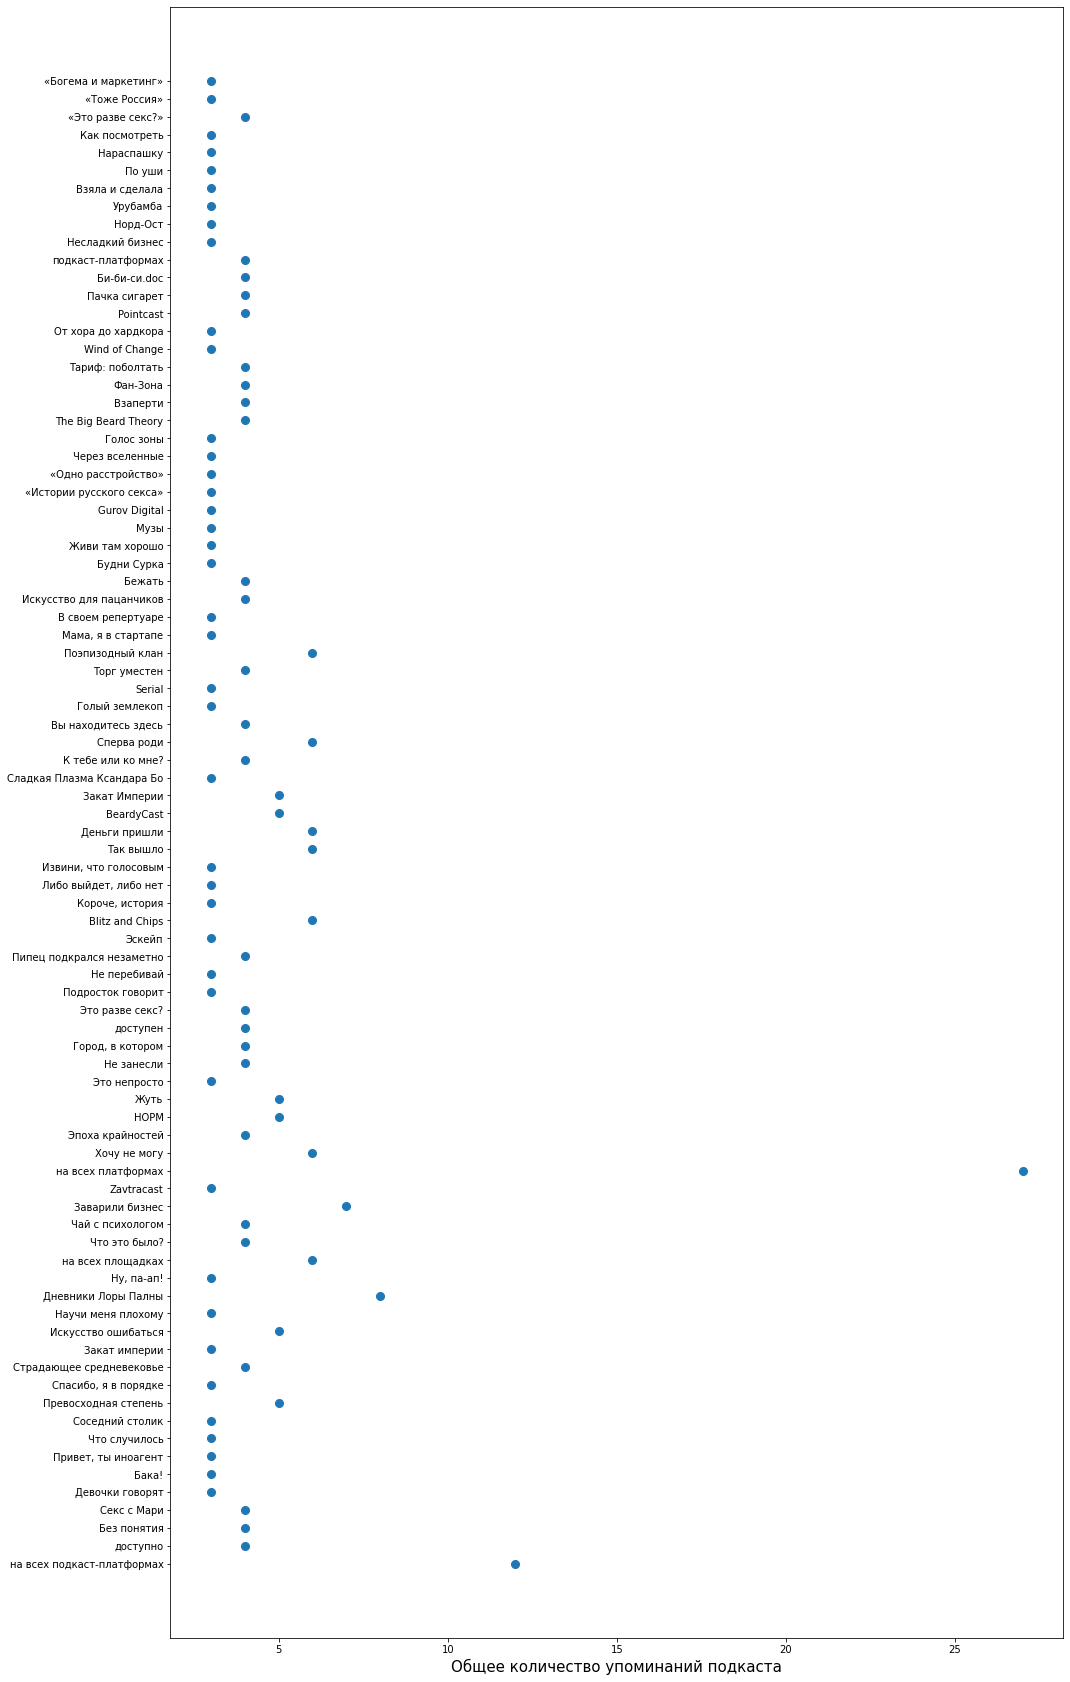

In [ ]:
plt.figure(figsize=(16,30))
plt.title('', fontsize=20)
plt.xlabel('Общее количество упоминаний подкаста', fontsize=15)
plt.plot(podcast_plot["x"], podcast_plot["label"], marker = 'o', linestyle='none', markersize=8)

<BarContainer object of 91 artists>

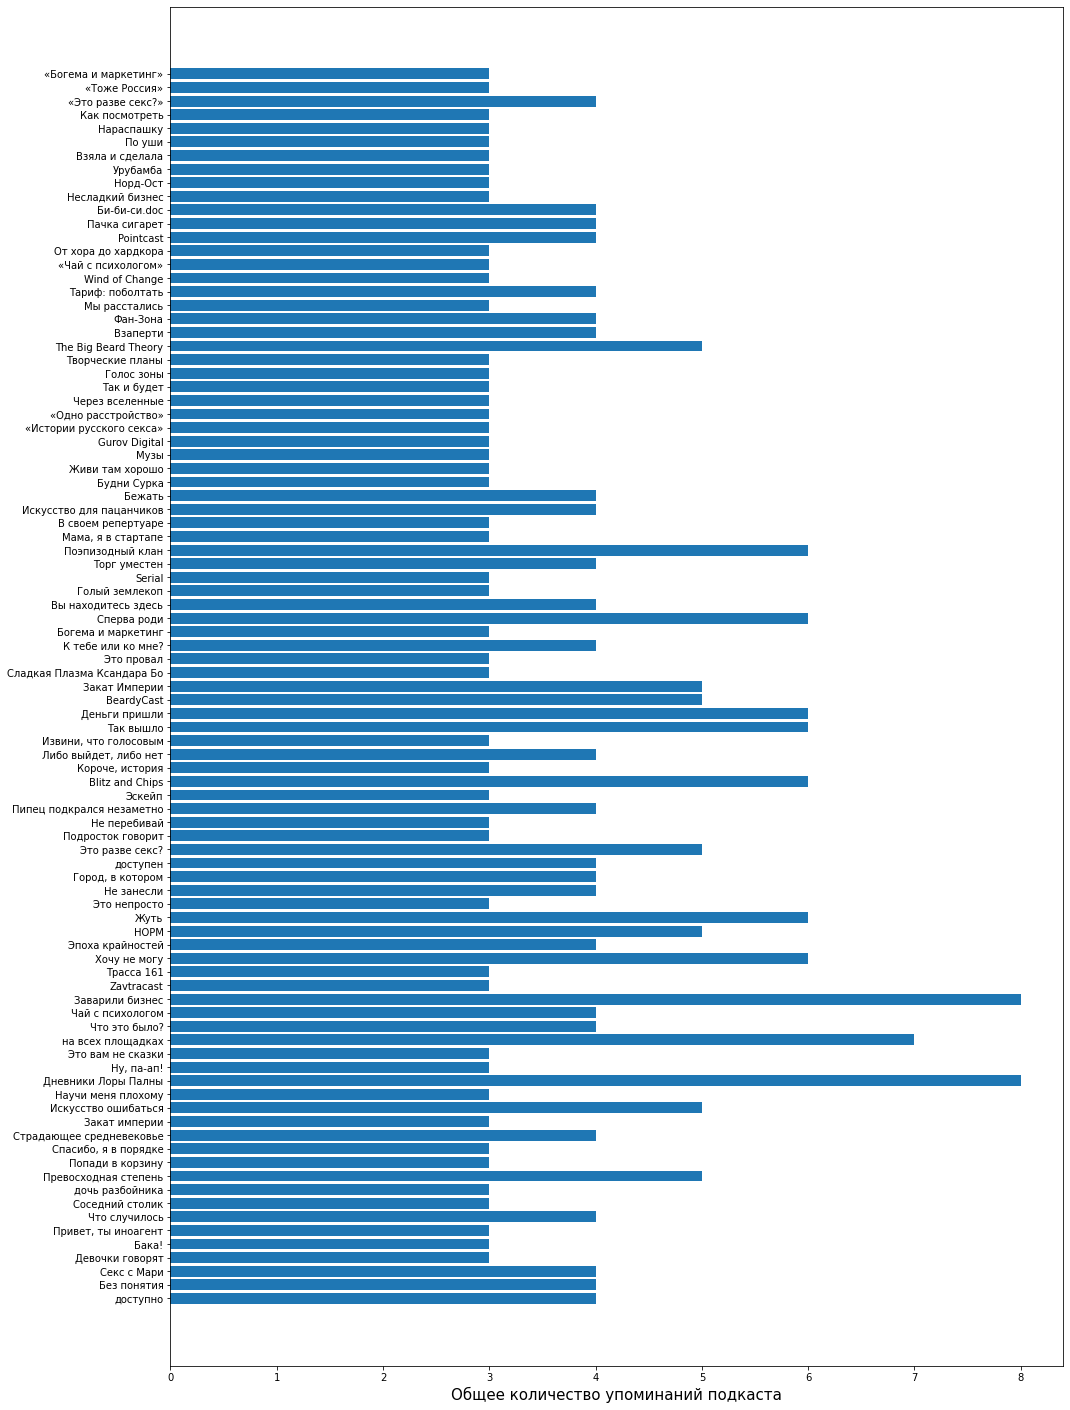

In [ ]:
plt.figure(figsize=(16,25))
plt.title('', fontsize=20)
plt.xlabel('Общее количество упоминаний подкаста', fontsize=15)
plt.barh(podcast_plot["label"], podcast_plot["x"], align = 'center', data = podcast_plot)

Теперь реализуем поисковик, который будет выдавать материалы, в которых упоминается нужный подкаст.

In [ ]:
podcast_list_of_lists=[]

for label in podcasts_names_and_links:
  podcast_list_of_lists.append(list(label.keys()))

In [ ]:
def search_podcast():
  name = input("Введите название подкаста: ")
  for i in range(len(podcast_list_of_lists)):
    if name in podcast_list_of_lists[i]:
      print(f"Подкаст {name} упоминается в материале {titles[i]}, ссылка: {links_to_materials[i]}")

In [ ]:
search_podcast()

Введите название подкаста: Либо выйдет, либо нет
Подкаст Либо выйдет, либо нет упоминается в материале Будь или не будь: стажёрские вакансии в подкастинге, ссылка: https://podcasts.ru/bud-ili-ne-bud-stazhyorskie-vakansii-v-podkastinge/
Подкаст Либо выйдет, либо нет упоминается в материале «Либо/Либо» — это, конечно, маленькая компания». Интервью с основателями студии «Либо/Либо», ссылка: https://podcasts.ru/libo-libo-eto-konechno-malenkaya-kompaniya-intervyu-s-osnovatelyami-studii-libo-libo/
Подкаст Либо выйдет, либо нет упоминается в материале Дайджест новостей: 16—23 июля, ссылка: https://podcasts.ru/dajdzhest-novostej-16-23-iyulya/
Подкаст Либо выйдет, либо нет упоминается в материале «Нам еще предстоит открыть для себя, что из нас получилось». Интервью с основателями студии подкастов «Заварили», ссылка: https://podcasts.ru/studii-podkastov-zavarili/
